# Giới thiệu

### Tổng quan

Chào mừng các bạn đã đến với bài tutorial Linear Regression tại VietAI - Lần này chúng ta sẽ học cách sử dụng 2 hai thư viện được sử dụng rất phổ biến trong Machine Learning - Numpy và TensorFlow. 
 
### Mục tiêu học tập

* Hiểu thêm về cách hoạt động của Numpy và Tensorflow Execution 
* Có thể viết một thuật toán đơn giản (và debug) với `Tensorflow Execution` và `Numpy` qua ví dụ về hồi quy tuyến tính.

# Giới thiệu

Bài toán lần này, chúng ta sẽ cùng nhau dự đoán giá nhà tại một thành phố Boston ở Mỹ với kích thước mẫu với 506 giá trị với 13 thuộc tính như sau

```
- CRIM (per capita crime rate by town) : tỷ lệ tội phạm bình quân đầu người theo thị trấn
- ZN (proportion of residential land zoned for lots over 25,000 sq.ft)
: tỷ lệ đất thổ cư được quy hoạch cho các lô trên 25.000 sq.ft
- INDUS (proportion of non-retail business acres per town) : tỷ lệ mẫu đất kinh doanh không bán lẻ trên mỗi thị trấn
- CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)): =1 nếu có dải đất bao sông,ngược lại = 0
- NOX (nitric oxides concentration (parts per 10 million)): nồng độ oxit nitric (phần trên 10 triệu)
- RM (average number of rooms per dwelling): số phòng trung bình mỗi người ở
- AGE (proportion of owner-occupied units built prior to 1940): tỷ lệ các đơn vị chủ sở hữu được xây dựng trước năm 1940
- DIS (weighted distances to five Boston employment centres): khoảng cách trọng số đến năm trung tâm việc làm Boston
- RAD (index of accessibility to radial highways): chỉ số khả năng tiếp cận đường cao tốc 
- TAX (full-value property-tax rate per $10,000): thuế tài sản đầy đủ / $ 10 000
- PTRATIO (pupil-teacher ratio by town): tỉ lệ học sinh - giáo viên theo thị trấn
- B 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
- LSTAT (% lower status of the population): tình trạng dân số thấp hơn
- MEDV (Median value of owner-occupied homes in $1000's): Giá trị trung bình của các ngôi nhà chủ sở hữu trong $ 1000
```

Với thông tin này, ta sẽ cùng nhau tiến hành xây dựng một hàm giả thuyết theo mô hình hồi quy tuyến tính dựa trên `numpy` và `tensorflow` để đưa ra giá nhà dựa trên ít nhất là 2 thuộc tính.

#### Nhập thư viện

In [3]:
# IMPORT 
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

#### Đọc dữ liệu

In [4]:
from utils_function import load_Boston_housing_data

raw_train_X, test_X, train_Y, test_Y = load_Boston_housing_data(feature_ind = [4,5])

Selected original features are ['NOX' 'RM']


Vừa rồi, ta vừa mới tải tập dữ liệu xuống và chiết ra thành 4 tập. 

Trong đó, `train_X` và `train_Y` được dùng để xây dựng mô hình. Còn `test_X`, `test_Y` được giữ lại và chỉ được dùng để đánh giá độ tốt của mô hình ở phút cuối. 

Tỉ lệ được chia ra giữa các phần xây dựng và kiểm chứng là 1:4 Sau này, chúng ta sẽ học kỹ hơn về phần này nên phần đánh giá độ tốt của mô hình mình chỉ dừng lại ở mức là thực thi câu hàm đánh giá.

Để đơn giản, dữ liệu được lấy vào chỉ gồm 2 đặc tính

```
    - NOX nitric oxides concentration (parts per 10 million)
    - RM average number of rooms per dwelling
```

Tạm dịch

```
    - INDUS: nồng độ oxit nitric (phần trên 10 triệu)
    - RM: số phòng trung bình mỗi căn hộ/ nhà
```

Để hiểu thêm về tập dữ liệu ta có thể làm thêm một số minh họa như sau

#### Minh họa dữ liệu

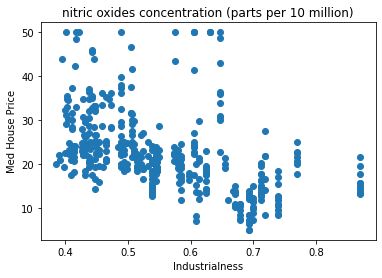

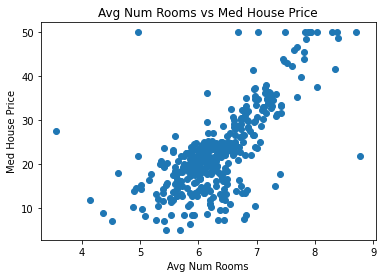

In [5]:
from utils_function import scatter_plot

scatter_plot(raw_train_X[:, 0], train_Y,\
            title="nitric oxides concentration (parts per 10 million)",\
            x_label = "Industrialness",\
            y_label = "Med House Price")


scatter_plot(raw_train_X[:, 1], train_Y,\
            title="Avg Num Rooms vs Med House Price",\
            x_label = "Avg Num Rooms",\
            y_label = "Med House Price")

#### Bài 1. Viết hàm cost function
Nhắc lại, từ công thức tính **mean squared error**, ta có:
$$\mathcal{L}(\hat{y}, y) = \frac{1}{2N} \sum_{i=1}^N (\hat{y}^{(i)}-y^{(i)})^2 $$
Khai triển, kết quả có là
$$\mathcal{L}(\hat{y}, y) = \frac{1}{2N} \sum_{i=1}^N (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

#### 1.1. Viết chương trình

In [6]:
# GRADED FUNCTION
def np_mse_cost(w, b, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w` and `b`.
    '''
    
    costs = 0
    N = len(y)
    for i in range(len(y)):
        
        # TO_DO_1: complete below expression to calculate cost function
        y_hat = np.dot(np.array(w).T, X[i]) + b
        costs += (y_hat - y[i])**2 / (2 * N)
        
    return costs

In [7]:
np_mse_cost([2], 0, [2,3], [0,2])

array([8.])

In [8]:
np_mse_cost([-1], 3, [2,3], [0,2])

array([1.25])

In [ ]:
np_mse_cost([2], -4, [2,3], [0,2])

#### Bài 2. Vector hóa hàm cost

Ngoài ra, ta còn có thể viết lại công thức trên như sau:

$$\mathcal{L}(\hat{y}, y) = \frac{1}{2N} \| \bf{X} \bf{w} + b \mathbb{1} - \bf{y} \| ^2$$ 

#### 2.1 Viết chương trình

In [246]:
# GRADED FUNCTION
def np_cost_vectorized(w, b, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
    '''
    
    #TO_DO_2: Complete the following expression
    N = len(y)
    w = np.array(w)
    y_hat = X.dot(w) + b

    cost = np.sum((y_hat - y) ** 2) / (2 * N)
    
    return cost

#### 2.2 Chạy thử chương trình

In [247]:
np_cost_vectorized([3, 5], 20, raw_train_X, train_Y)

494.2816446016336

In [248]:
np_cost_vectorized([3, 5], 0, raw_train_X, train_Y)

82.9864267798515

### Tìm nghiệm chính xác

#### Bài 3. Tính nghiệm chính xác

Hiên thời, vecto của ta đang có dạng như sau:

In [249]:
print("Size of data X Matrix %s"  % str(raw_train_X.shape))

Size of data X Matrix (404, 2)


In [250]:
print("Size of data Y array %s"  % str(train_Y.shape))

Size of data Y array (404,)


Để chuyển qua phép tính ma trận có dạng như sau $X *w + b$ ta cần bổ sung thêm một chiều cho hệ số tự do ở phần cuối của mỗi dòng trong ma trận. 

**Ví dụ** Lấy dòng đầu tiên của ma trận hiện thời, ta có: `array([ 6.2  ,  6.951 ])`   $\,\to\,$  `array([ 6.2  ,  6.951,  1.   ])`

#### 3. 1 Tái tạo vector cho tập train

In [251]:
# Add one at the end of each row in train_X by np.concatenate
train_X = np.concatenate([raw_train_X, np.ones([np.shape(raw_train_X)[0], 1])], axis=1)

#### 3.2 Viết chương trình tính nghiệm
 
$$w = \left(X^{\rm T}X\right)^{-1} \left(X^{\rm T}y \right) =  A * c $$

In [252]:
# GRADED FUNCTION
def np_solve_exactly(X, y):
    '''
    Solve linear regression exactly. (fully vectorized)
    
    Given `X` - NxD matrix of inputs
          `t` - target outputs
    Returns the optimal weights as a D-dimensional vector

    '''
    #TO_DO_3: Complete the below followed the above expressions
    from numpy.linalg import pinv
    A = pinv(np.dot(X.T, X))
    c = np.dot(X.T, y)
    
    return np.dot(A, c)

#### 3.3 Chạy thử chương trình

In [270]:
opt_w_exactly = np_solve_exactly(train_X, train_Y)
print(opt_w_exactly)
print("Cost:", np_cost_vectorized(opt_w_exactly[:2], opt_w_exactly[2], raw_train_X, train_Y))

[-21.65929075   8.28370138 -17.55023481]
Cost: 18.59241485172422


### Tìm nghiệm xấp xỉ bằng `Numpy`


#### Bài 4. Véc-tơ hóa hàm tính grad

Với $i = 1...m $ và $j = 1...n$ xét

$$ \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{N}\sum_i x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$



#### 4.1 Viết chương trình

In [254]:
# GRADED FUNCTION
def np_grad_fn(weights, X, y):
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    #TO_DO_4: Complete the below followed the above expressions
    N, D = X.shape
    y_hat = np.dot(X, weights)
    error = np.dot(y_hat - y, X) / N
    return error

In [255]:
np_grad_fn([3,5], raw_train_X, train_Y)

array([ 6.27899469, 64.39731918])

#### Bài  5. Tính dựa trên Gradient Descent

Xấp xỉ giá nghiệm như sau

$$ w := w - \alpha * \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}$$

#### 5.1 Viết chương trình

In [256]:
# GRADED FUNCTION
def np_solve_via_gradient_descent(X, y, niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    for k in range(niter):
        #TO_DO_5: Complete the below followed the above expressions
        dw = alpha * np_grad_fn(w, X, y)
        w = w - dw
    return w

#### 5.2 Chạy thử chương trình

In [257]:
opt_w = np_solve_via_gradient_descent(train_X, train_Y)
print(opt_w)

[-21.81212761   8.26000052 -17.31471467]


In [258]:
print("Training cost:", np_cost_vectorized(opt_w[:2], opt_w[2], raw_train_X, train_Y))

Training cost: 18.592617428150596


In [261]:
print("Testing cost:", np_cost_vectorized(opt_w[:2], opt_w[2], test_X, test_Y))

Testing cost: 23.955298316530822


####  Bài 6. Kỹ thuật tách/trích đặc trưng (Feature Engineering)

Feature Engineering là quá trình chuyển đổi tập dữ liệu thô ban đầu thành các đặc trưng (thuộc tính) quan trọng đại diện cho các mẫu dữ liệu huấn luyện giúp nâng cao độ chính xác của mô hình huấn luyện. các bài toán con trong Feature Engineering gồm trích xuất đặc trưng (Feature Extraction), lựa chọn đặc trưng (Feature Selection), học đặc trưng (Feature Learning) (sách "Big Data Analytics: Systems, Algorithms, Applications").

Trong bài này chúng ta sử dụng phương pháp **Feature Extraction**, cụ thể xây dựng các đặc trưng mới để nâng cao độ chính xác của mô hình


In [237]:
n_samples, dimension = raw_train_X.shape
X1 = raw_train_X[:,0].reshape((n_samples,1))
X2 = raw_train_X[:,1].reshape((n_samples,1))
X1_sqr = (X1**2).reshape((n_samples,1))
sin_X2 = (np.sin(X2)).reshape((n_samples,1))
X1X2 = (X1*X2).reshape((n_samples,1))
# create new input from new features
new_train_X = np.concatenate((X1,X2,X1_sqr,sin_X2,X1X2),axis=1) # concatenate new features here

In [238]:
# Add one at the end of each row in new_train_X by np.concatenate
featured_train_X = np.concatenate([new_train_X, np.ones([np.shape(new_train_X)[0], 1])], axis=1)

In [263]:
# Calculate weight for new featured X using  np_solve_via_gradient_descent
opt_w = np_solve_via_gradient_descent(featured_train_X, train_Y)

In [265]:
# Calculate cost for new featured X 
print("New Training cost:", np_cost_vectorized(opt_w[:-1], opt_w[-1], new_train_X, train_Y))

New Training cost: 17.731313769362917


Nhận xét : Cost khi sử dụng các feature mới nhỏ hơn so với feature gốc
